# A Beginner’s Guide to Word Embedding with Gensim Word2Vec Model

### 來源：https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92

### source code: https://github.com/zhlli1/Genism-word2vec

### data set: https://www.kaggle.com/CooperUnion/cardataset?select=data.csv

In [1]:
!pip install --upgrade gensim

Requirement already up-to-date: gensim in /opt/conda/lib/python3.7/site-packages (3.8.3)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

from gensim.models import Word2Vec
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from sklearn.manifold import TSNE
from numpy import dot
from numpy.linalg import norm

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('dataset/CooperUnion.data.csv')
print(len(df))
df.head()

11914


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df['Maker_Model']= df['Make']+ " " + df['Model']
df['Maker_Model']

0        BMW 1 Series M
1          BMW 1 Series
2          BMW 1 Series
3          BMW 1 Series
4          BMW 1 Series
              ...      
11909         Acura ZDX
11910         Acura ZDX
11911         Acura ZDX
11912         Acura ZDX
11913    Lincoln Zephyr
Name: Maker_Model, Length: 11914, dtype: object

In [5]:
# Select features from original dataset to form a new dataframe 
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size', 'Vehicle Style', 'Maker_Model']]
# For each row, combine all the columns into one column
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)
df2[1]

'premium unleaded (required),MANUAL,rear wheel drive,Luxury,Performance,Compact,Convertible,BMW 1 Series'

In [6]:
# Store them in the pandas dataframe
df_clean = pd.DataFrame({'clean': df2}) 
# Create the list of list format of the custom corpus for gensim modeling 
sent = [row.split(',') for row in df_clean['clean']]
# show the example of list of list format of the custom corpus for gensim modeling 
sent[1:]

[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Compact',
  'Convertible',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unlea

In [7]:
## Train the genisim word2vec model with our own custom corpus
model = Word2Vec(sent, min_count=1,size= 50,workers=3, window =3, sg = 1)

WARNING - 18:38:30: consider setting layer size to a multiple of 4 for greater performance
INFO - 18:38:30: collecting all words and their counts
INFO - 18:38:30: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 18:38:30: PROGRESS: at sentence #10000, processed 74060 words, keeping 841 word types
INFO - 18:38:30: collected 977 word types from a corpus of 88129 raw words and 11914 sentences
INFO - 18:38:30: Loading a fresh vocabulary
INFO - 18:38:30: effective_min_count=1 retains 977 unique words (100% of original 977, drops 0)
INFO - 18:38:30: effective_min_count=1 leaves 88129 word corpus (100% of original 88129, drops 0)
INFO - 18:38:30: deleting the raw counts dictionary of 977 items
INFO - 18:38:30: sample=0.001 downsamples 35 most-common words
INFO - 18:38:30: downsampling leaves estimated 29996 word corpus (34.0% of prior 88129)
INFO - 18:38:30: estimated required memory for 977 words and 50 dimensions: 879300 bytes
INFO - 18:38:30: resetting layer weights

In [8]:
## We can obtain the word embedding directly from the training model
model['Toyota Camry']

array([-0.11759192, -0.17217404, -0.22980921,  0.1835627 ,  0.09256233,
       -0.01008086,  0.16837363,  0.24253216,  0.04606363, -0.06004899,
        0.32750905,  0.16240774, -0.07852636, -0.02005165, -0.26538575,
       -0.12229669, -0.05561225,  0.01659423, -0.14718221,  0.04547635,
        0.01122416,  0.1696965 , -0.05522715,  0.14433426,  0.01389647,
        0.03541202,  0.15914436, -0.06268039, -0.11639075,  0.04505116,
       -0.18197508, -0.06093133, -0.17849998, -0.14472689,  0.09930821,
       -0.0770236 , -0.13742712, -0.09763815, -0.16001515, -0.04718952,
        0.08202906, -0.0538713 , -0.15729985, -0.2362442 ,  0.02607406,
        0.04964129,  0.05985842, -0.01813849,  0.06790892,  0.04941118],
      dtype=float32)

In [9]:
model.similarity('Porsche 718 Cayman', 'Nissan Van')

0.87232816

In [10]:
model.similarity('Porsche 718 Cayman', 'Mercedes-Benz SLK-Class')

0.9852863

In [11]:
## Show the most similar vehicles for Mercedes-Benz SLK-Class : Default by eculidean distance 
model.most_similar('Mercedes-Benz SLK-Class')[:5]

INFO - 18:38:30: precomputing L2-norms of word weight vectors


[('Toyota MR2 Spyder', 0.9958460330963135),
 ('Mercedes-Benz SL-Class', 0.9956529140472412),
 ('Porsche Boxster', 0.9941491484642029),
 ('Honda S2000', 0.9937805533409119),
 ('Maserati GranSport', 0.9937742352485657)]

In [12]:
## Show the most similar vehicles for Toyota Camry : Default by eculidean distance 
model.most_similar('Toyota Camry')[:5]

[('Nissan Altima', 0.9925758242607117),
 ('Suzuki Kizashi', 0.9919228553771973),
 ('Mitsubishi Galant', 0.9906126856803894),
 ('Buick Verano', 0.9903188347816467),
 ('Nissan Sentra', 0.9897345304489136)]

In [13]:
def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model[word]
    for item in target_list :
        if item != word :
            b = model [item]
            cos_sim = dot(a, b)/(norm(a)*norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

In [14]:
Maker_Model = list(df.Maker_Model.unique()) ## only get the unique Maker_Model_Year
## Show the most similar Mercedes-Benz SLK-Class by cosine distance 
cosine_distance (model,'Mercedes-Benz SLK-Class',Maker_Model,5)

[('Toyota MR2 Spyder', 0.99584615),
 ('Mercedes-Benz SL-Class', 0.9956529),
 ('Porsche Boxster', 0.99414915),
 ('Honda S2000', 0.99378055),
 ('Maserati GranSport', 0.99377424)]

In [15]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.similar_by_word(word)

    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

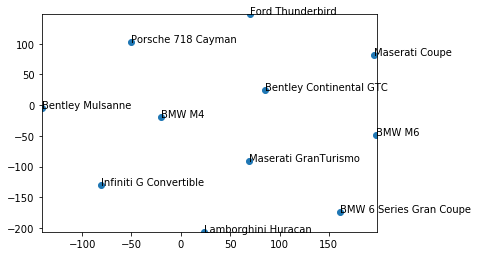

In [16]:
display_closestwords_tsnescatterplot(model, 'Porsche 718 Cayman', 50)